In [1]:
!python --version

Python 3.6.6 :: Anaconda, Inc.


# Seaborn Tutorial 

- Countplot
- Distplot
- Kdeplot
- Boxplot
- Catplot
    - boxplot
    - violinplot
    - swarmplot
    - boxenplot
- Heatmap
- Clustermap
- Pointplot
- LMplot
- Jointplot
- Pairplot
- PairGrid

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.__version__

'0.9.0'

In [3]:
data = pd.read_csv('../input/students-performance-in-exams/StudentsPerformance.csv')

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
data.describe(include='all')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000,1000,1000,1000,1000,1000.00000,1000.000000,1000.000000
unique,2,5,6,2,2,NaN,NaN,NaN
top,female,group C,some college,standard,none,NaN,NaN,NaN
freq,518,319,226,645,642,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,66.08900,69.169000,68.054000
std,NaN,NaN,NaN,NaN,NaN,15.16308,14.600192,15.195657
min,NaN,NaN,NaN,NaN,NaN,0.00000,17.000000,10.000000
25%,NaN,NaN,NaN,NaN,NaN,57.00000,59.000000,57.750000
50%,NaN,NaN,NaN,NaN,NaN,66.00000,70.000000,69.000000
75%,NaN,NaN,NaN,NaN,NaN,77.00000,79.000000,79.000000


In [7]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


## Countplot

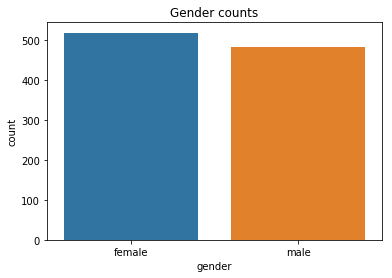

In [9]:
ax = sns.countplot(data['gender'])
ax.set_title("Gender counts")
plt.show()

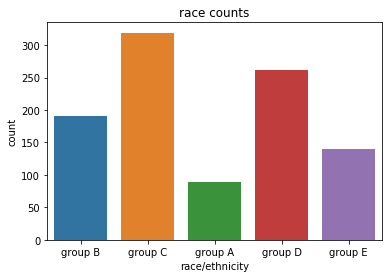

In [10]:
ax = sns.countplot(data['race/ethnicity'])
ax.set_title("race counts")
plt.show()

## Barplot

In [12]:
data['gender'].value_counts().index

Index(['female', 'male'], dtype='object')

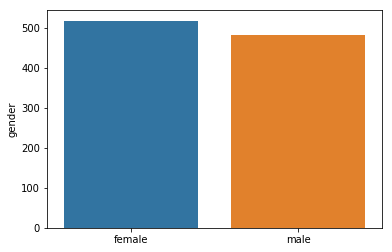

In [13]:
sns.barplot(data['gender'].value_counts().index, data['gender'].value_counts())
plt.show()

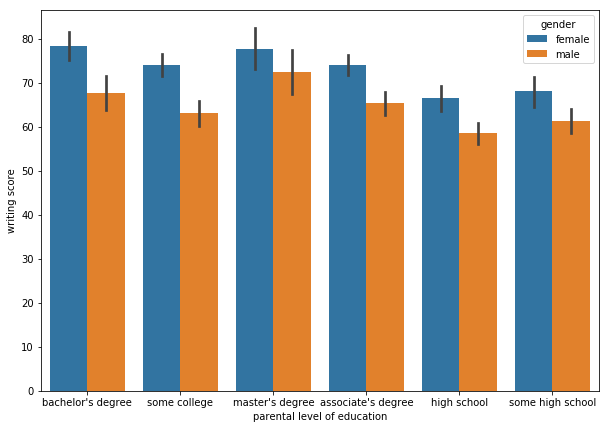

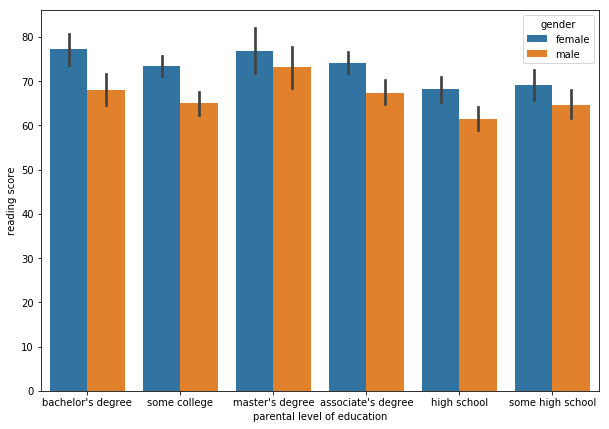

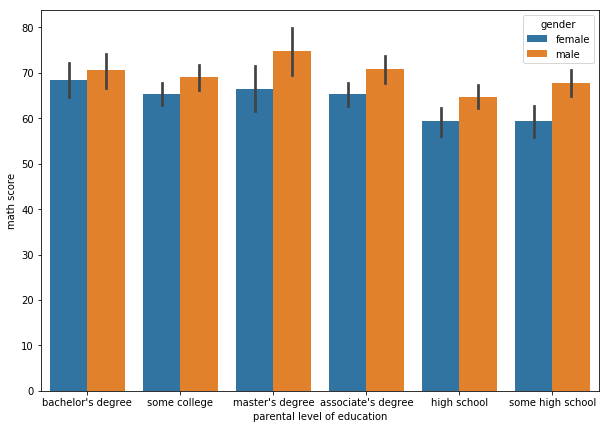

In [15]:
def barplot(x, y, hue):
    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    sns.barplot(x, y, hue=hue, data=data)

for y in ['writing score', 'reading score', 'math score']:
    barplot('parental level of education', y, 'gender')

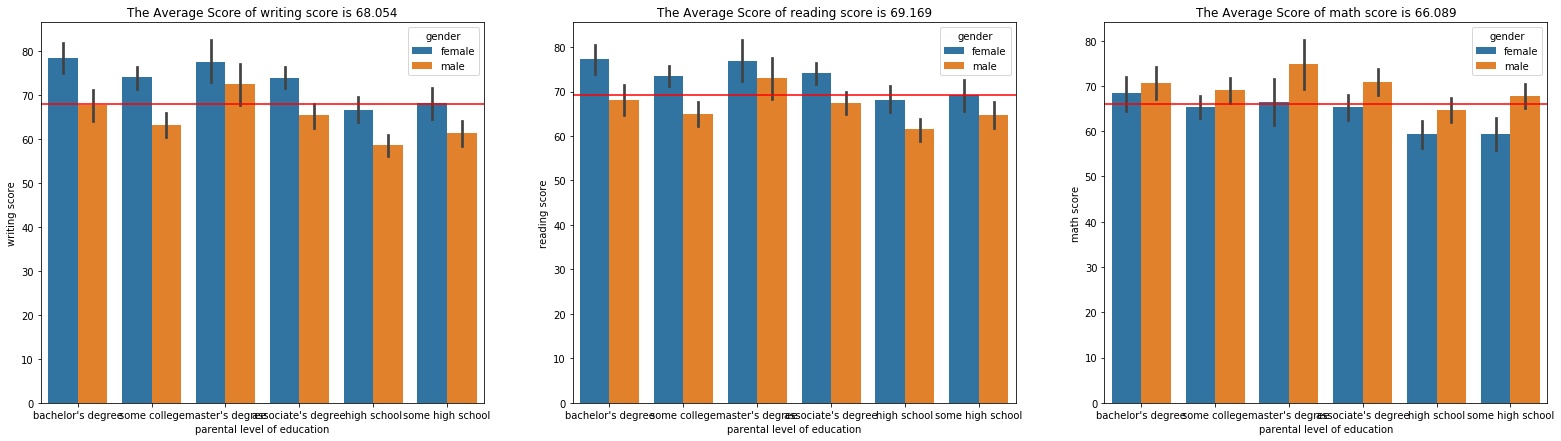

In [17]:
def barplot_with_avg(x, y, hue, ax):
    sns.barplot(x, y, hue=hue, data=data, ax=ax)
    avg = data[y].sum().sum() / len(data)
    ax.axhline(avg, color='r')
    ax.set_title(f'The Average Score of {y} is {avg}')

fig, ax = plt.subplots(1, 3, figsize=(27, 7))
for idx, y in enumerate(['writing score', 'reading score', 'math score']):
    barplot_with_avg('parental level of education', y, 'gender', ax[idx])

## Distplot

In [30]:
def distplot(data, x, ax):
    bins = range(-10, 110, 10)
    sns.distplot(data[x], bins=bins, ax=ax)

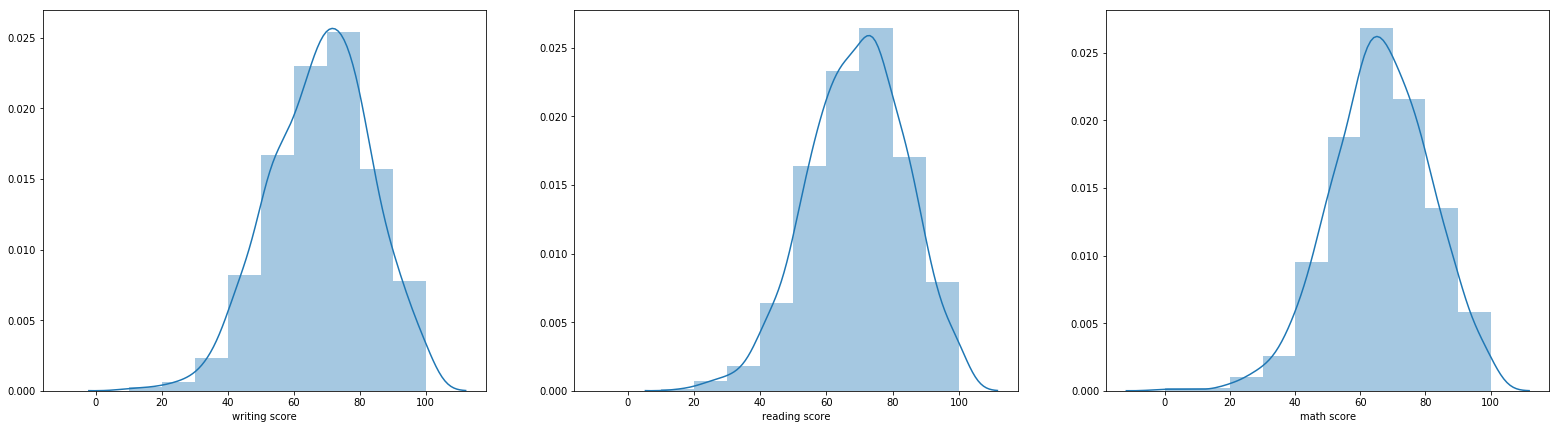

In [31]:
fig, ax = plt.subplots(1, 3, figsize=(27, 7))
for idx, y in enumerate(['writing score', 'reading score', 'math score']):
    distplot(data, y, ax[idx])

## Kdeplot

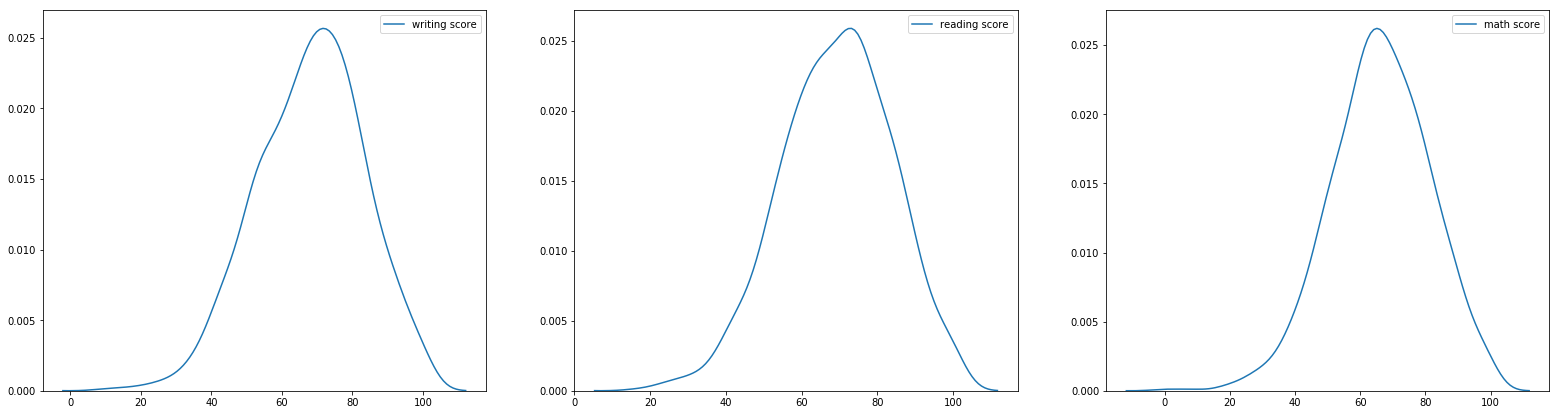

In [32]:
def kdeplot(data, x, ax):
    sns.kdeplot(data[x], ax=ax)

fig, ax = plt.subplots(1, 3, figsize=(27, 7))
for idx, y in enumerate(['writing score', 'reading score', 'math score']):
    kdeplot(data, y, ax[idx])

## Catplot : easy demo drawing similar plot

If you can use barplot, you can use **stripplot, swarmplot, boxplot, violinplot, boxenplot, pointplot** too!


## Pointplot


## LMplot

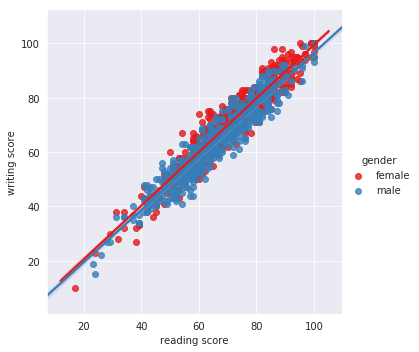

In [62]:
sns.lmplot(x='reading score', y='writing score', hue='gender', data=data, palette='Set1')
plt.show()

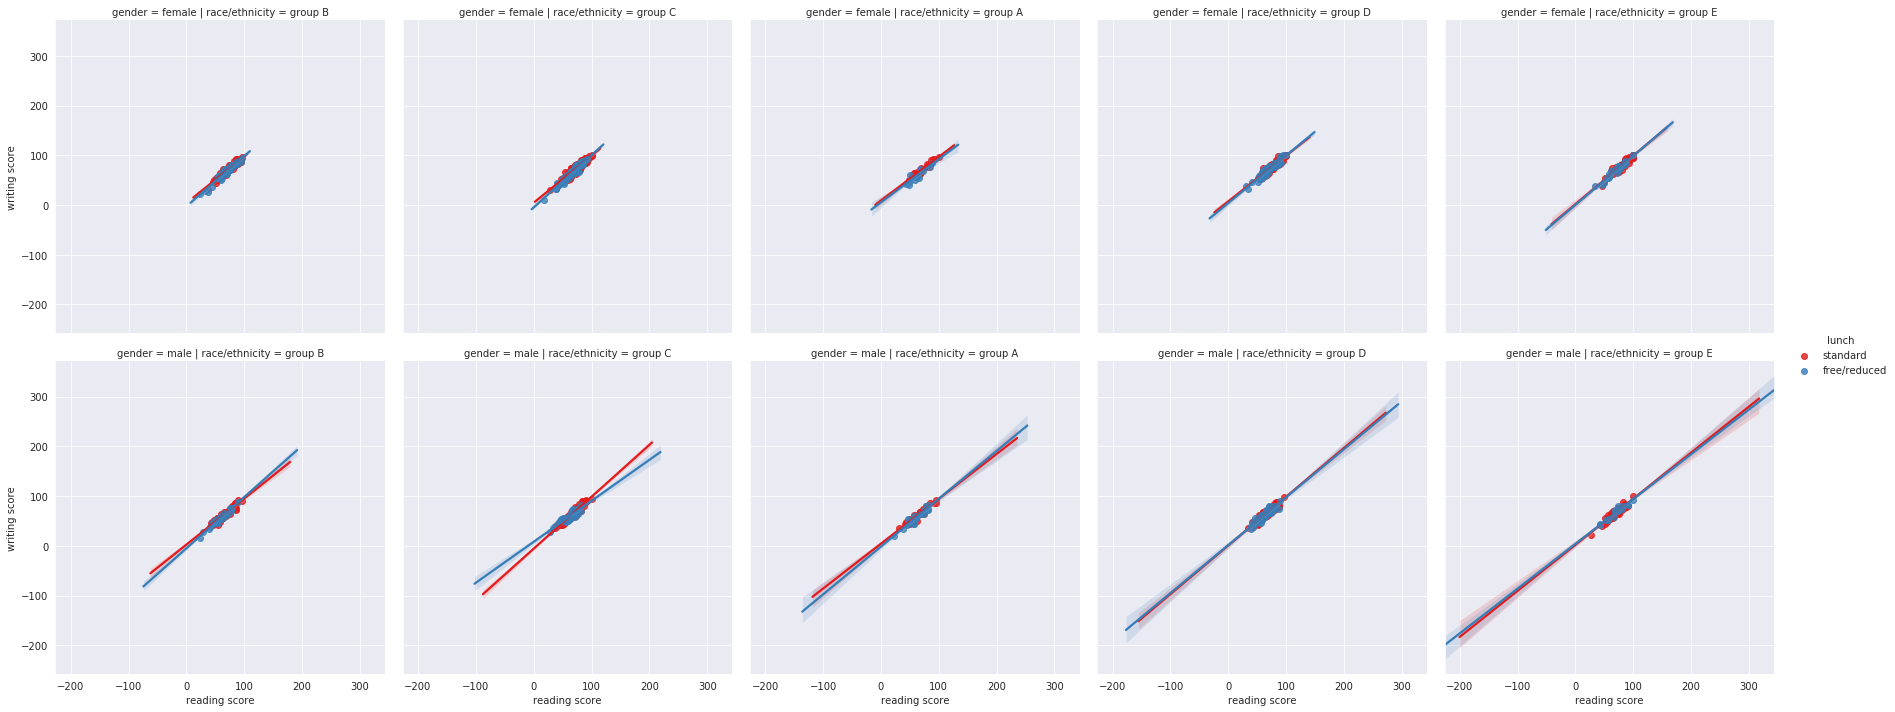

In [67]:
sns.lmplot(x='reading score', y='writing score', row='gender', col='race/ethnicity', hue='lunch', data=data, palette='Set1')
plt.show()

## Jointplot

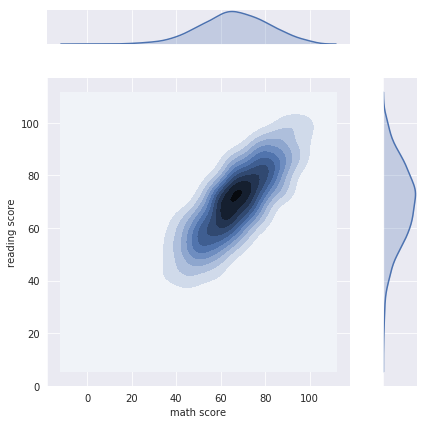

In [39]:
sns.set({'figure.figsize': (15, 15)})
sns.jointplot('math score', 'reading score', data=data, kind='kde', space=1)
plt.show()

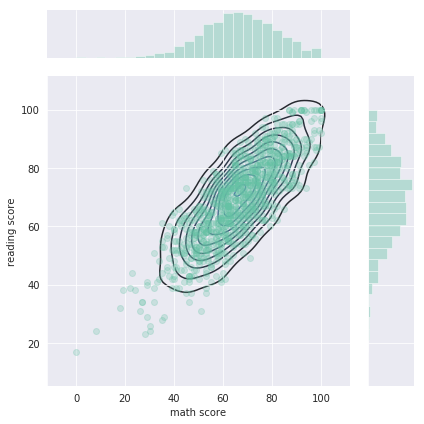

In [40]:
sns.set({'figure.figsize':(7,7)})
g = sns.jointplot('math score', 'reading score', data=data, kind='scatter', space=0, alpha=0.25, 
                  color=sns.color_palette("Set2")[0]).plot_joint(sns.kdeplot, zorder=0)
plt.tight_layout()
plt.show()

## Heatmap

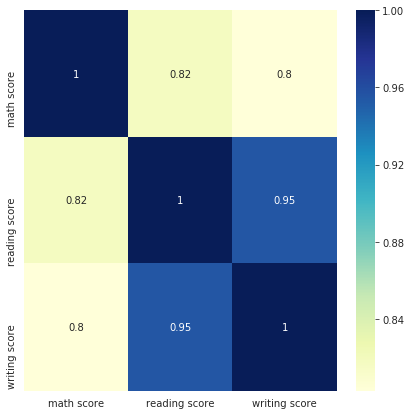

In [58]:
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

## Pairplot


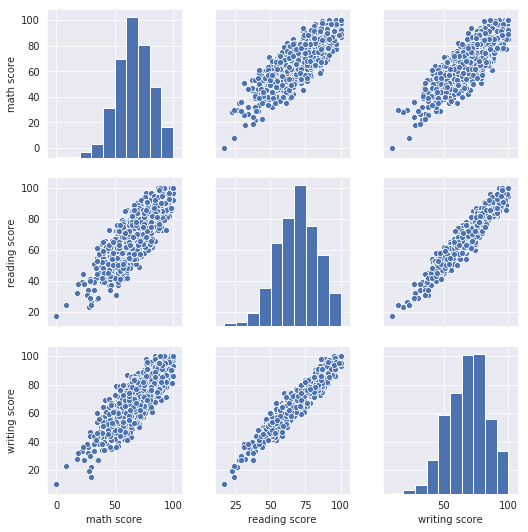

In [54]:
sns.pairplot(data)
plt.show()

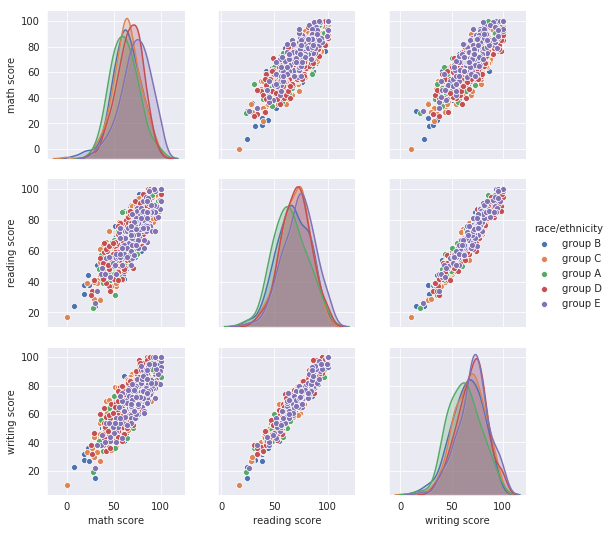

In [55]:
sns.pairplot(data, kind="scatter", hue='race/ethnicity')

## Pairgrid


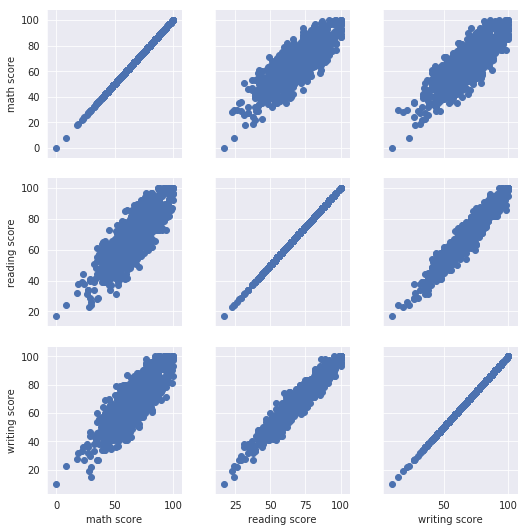

In [68]:
g = sns.PairGrid(data)
g.map(plt.scatter)
plt.show()

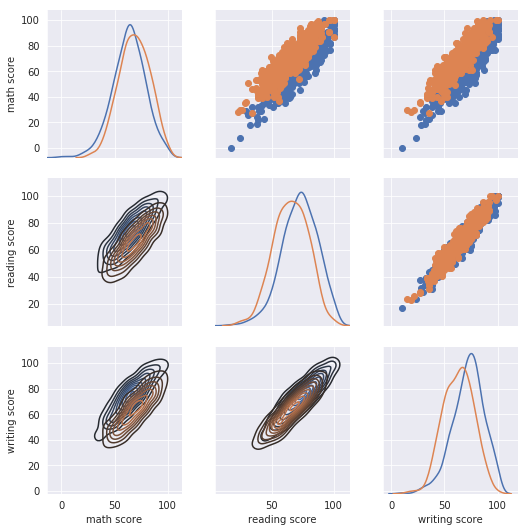

In [69]:
g = sns.PairGrid(data, hue='gender')
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot)
plt.show()